<a href="https://colab.research.google.com/github/taro-masuda/singing_voice_recommendation/blob/master/calculate_mfcc_and_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import librosa
import glob
import numpy as np

In [20]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sr=16000
n_mfcc=20

In [0]:
file_list = glob.glob("drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/*.wav")
file_list = sorted(file_list)

# MFCC Extraction

In [29]:
M = np.empty(0)
count = 0
for filename in file_list:
  print(filename)
  try:
    y, sr = librosa.core.load(filename, sr=sr, mono=False,offset=0.0,
                            duration=None, res_type='kaiser_best')
  except:
    print(filename + "has loading error!")
    y = np.zeros([2,48000])
  mfcc = librosa.feature.mfcc(y.mean(axis=0), sr=sr, S=None, n_mfcc=n_mfcc, dct_type=2, norm='ortho')
  mfcc_median = np.median(mfcc, axis=1)
  assert mfcc_median.shape == (n_mfcc,)
  mfcc_median = np.reshape(mfcc_median, [-1,20])
  print(M.shape)  

  if count > 0:
    M = np.concatenate([M, mfcc_median], axis=0)  
  else:
    M = mfcc_median
    M = np.reshape(M,[-1,20])
  if count > 0:
    assert M.shape[1] == n_mfcc
  count += 1
print(M.shape)
assert M.shape[0] == 1000
assert M.shape[1] == 20

drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/008jrQKCdBGzQdxp9Fk40z.wav
(0,)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/00Nw7w9YQQmJLOmG4ZEGYH.wav
(1, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/01k7uuVtfuOKtbCZ3YMN2L.wav
(2, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/022X58N6Tv7klHzcMzCtAl.wav
(3, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/02me5PrRaF8baUbyiJ0bv7.wav
(4, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/02xCHhTG3lRknzXq6cbcJh.wav
(5, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/03RvvQSoODrEUrK5qF1zXu.wav
(6, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/04EuDx4WKmkN9NyZ6kk5lj.wav
(7, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/04LvVWwoYPYRjJklOpppyf.wav
(8, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/05OHGzibvNF0oPyQ2zbyYd.wav
(9, 20)
drive/My Drive/Colab Notebooks/spotify/input/tracks_sv/06BIna6ik1U4hoR0XlSfzw.wav
(10, 20)
drive/My Dri

In [0]:
import pickle
with open('drive/My Drive/Colab Notebooks/spotify/input/singing_voice_mfcc.pickle', mode='wb') as f:
  pickle.dump(M, f)

# Calculate Cosine Similarity

In [0]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [0]:
S = np.zeros([1000,1000])
for i in range(S.shape[0]):
  for j in range(S.shape[1]):
    S[i][j] = cos_sim(M[i,:], M[j,:])

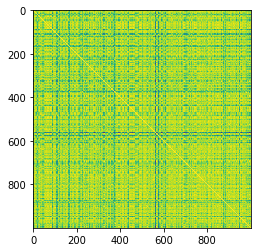

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(S)

In [0]:
import pandas as pd
